In [1]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np
import path_analysis
import rearing_distribution

In [2]:
perturbation_root_path = ['../FS04/Visual/']*4
perturbation_tags = ['20210315-102910', '20210317-114106', '20210319-194911', '20210329-164553']
root_path = ['../FS04/Control/']*4
tags = ['20210315-155158','20210316-155817', '20210317-152846', '20210318-110137','20r210329-182246']
visual_perturbation = base.MultiDaysBeaconPosition(perturbation_root_path, perturbation_tags, has_beacon = True, has_metadata= True)
control = base.MultiDaysBeaconPosition(root_path, tags, has_beacon = True, has_metadata= True) 

/opt/homebrew/Caskroom/miniforge/base/envs/rearing/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
## Basic statistics

Text(0.5, 0, 'Speed [m/s]')

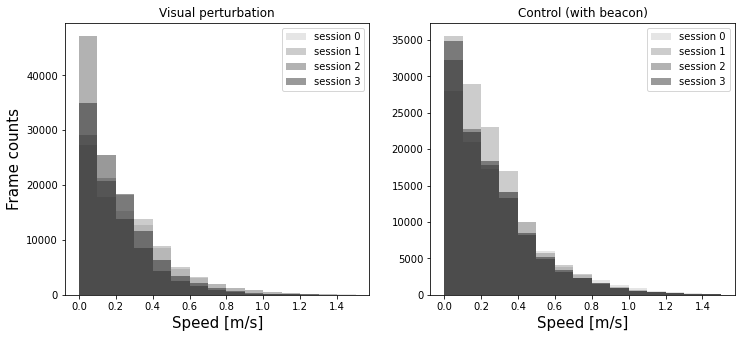

In [4]:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Visual perturbation')
for i in range(4):
    plt.hist(visual_perturbation.dataset_list[i].speed, bins = 15, range = (0, 1.5), alpha = 0.1*i+0.1, color = 'k' , label = f'session {i}')
plt.legend()
plt.xlabel('Speed [m/s]', fontsize = 15)
plt.ylabel('Frame counts', fontsize = 15)


plt.subplot(122)
plt.title('Control (with beacon)')
for i in range(4):
    plt.hist(control.dataset_list[i].speed, bins = 15, range = (0, 1.5), alpha = 0.1*i+0.1, color = 'k' , label = f'session {i}')
plt.legend()
plt.xlabel('Speed [m/s]', fontsize = 15)

In [5]:
print('VISUAL PERTURBATION')
for i, dist in enumerate(visual_perturbation.distance_per_session):
    print(f'For session {i}, total distance the rat traveled is: {dist} [m]')

print('CONTROL WITH BEACON')
for i, dist in enumerate(control.distance_per_session):
    print(f'For session {i}, total distance the rat traveled is: {dist} [m]')

VISUAL PERTURBATION
For session 0, total distance the rat traveled is: 464.6485950041573 [m]
For session 1, total distance the rat traveled is: 499.2166296136854 [m]
For session 2, total distance the rat traveled is: 295.26686330601297 [m]
For session 3, total distance the rat traveled is: 395.12176214280504 [m]
CONTROL WITH BEACON
For session 0, total distance the rat traveled is: 476.57950909182335 [m]
For session 1, total distance the rat traveled is: 510.3562326747254 [m]
For session 2, total distance the rat traveled is: 416.6828597140355 [m]
For session 3, total distance the rat traveled is: 432.2446729381727 [m]


In [7]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2
print(x_offset, y_offset)

-0.27999999999999997 -0.8410000000000001


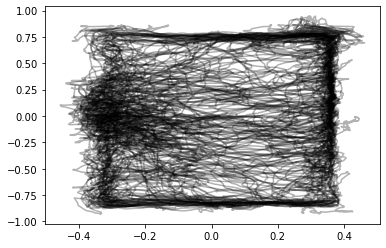

In [3]:
session_no=0
alpha=0.3
for k,t in enumerate(visual_perturbation.trial_list[session_no][1:]):
    plt.plot(t[:,1], t[:,2], color = 'k', alpha = alpha)

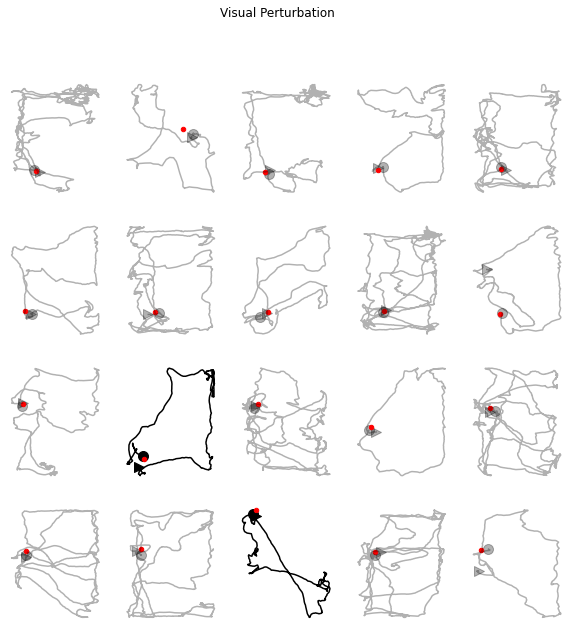

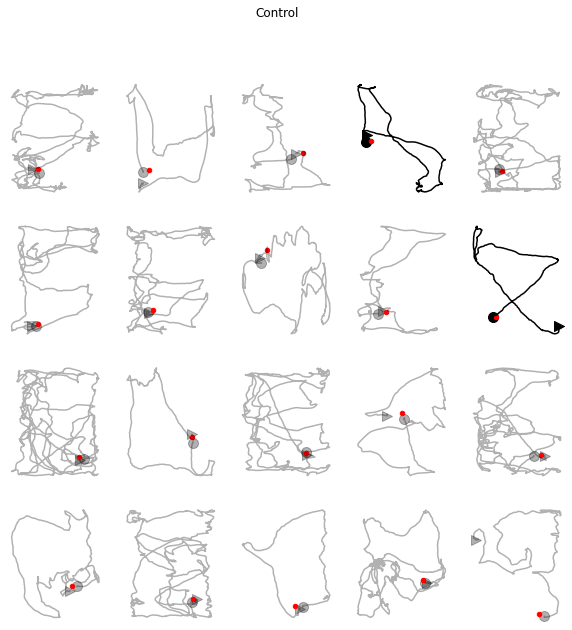

In [4]:
## Visible trials are in gray and invisible trials are in black
fig=plt.figure(figsize = (10,10))
fig.suptitle('Visual Perturbation')
session_no = 0
for k,t in enumerate(visual_perturbation.trial_list[session_no][1:]):
    plt.subplot(4,5, k+1)
    if not visual_perturbation.trial_visible[session_no][k]:
        alpha = 1
    else:
        alpha = 0.3
    plt.plot(t[:,1], t[:,2], color = 'k', alpha = alpha)
    plt.scatter(t[0,1], t[0,2], c = 'k', marker = 'o', s = 100, alpha = alpha)
    plt.scatter(t[-1,1], t[-1,2], c= 'k', marker = '>', s = 100, alpha = alpha)
    plt.scatter(visual_perturbation.beacon_list[session_no][k,0], visual_perturbation.beacon_list[session_no][k,1], c = 'red', s = 20)
    plt.axis('off')
    if k+1 == 20:
        break

## Visible trials are in gray and invisible trials are in black
fig=plt.figure(figsize = (10,10))
fig.suptitle('Control')
session_no = 0
for k,t in enumerate(control.trial_list[session_no][1:]):
    plt.subplot(4,5, k+1)
    if not control.trial_visible[session_no][k]:
        alpha = 1
    else:
        alpha = 0.3
    plt.plot(t[:,1], t[:,2], color = 'k', alpha = alpha)
    plt.scatter(t[0,1], t[0,2], c = 'k', marker = 'o', s = 100, alpha = alpha)
    plt.scatter(t[-1,1], t[-1,2], c= 'k', marker = '>', s = 100, alpha = alpha)
    plt.scatter(control.beacon_list[session_no][k,0], control.beacon_list[session_no][k,1], c = 'red', s = 20)
    plt.axis('off')
    if k+1 == 20:
        break
            

In [18]:
session_no = 0
trial_no =3
perturbation_straightness_moment = path_analysis.straightness_moment_time(visual_perturbation.trial_list[session_no][trial_no][:,:3], before_time=2)
perturbation_straightness_time = path_analysis.straightness_over_time(visual_perturbation.trial_list[session_no][trial_no][:,:3], before_time=2)

Visual perturbation example


/Users/jin/Multiple_trial_analysis/refactoring/demo_notebook/../path_analysis.py:76: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)


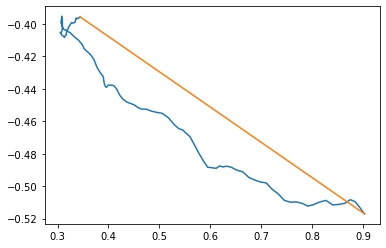

In [30]:
print('Visual perturbation example')
plt.plot(perturbation_straightness_moment[2][:,0], perturbation_straightness_moment[2][:,1])
plt.plot(perturbation_straightness_moment[1][:,0], perturbation_straightness_moment[1][:,1])

perturbation_moment_straigtness_list = []
perturbation_time_straigtness_list = []
for i in range(len(visual_perturbation.trial_list[session_no])):
    moment_, _, _ = path_analysis.straightness_moment_time(visual_perturbation.trial_list[session_no][i][:,:3], before_time=2)
    time_, _, _ = path_analysis.straightness_over_time(visual_perturbation.trial_list[session_no][i][:,:3], before_time=2)
    perturbation_moment_straigtness_list.append(moment_)
    perturbation_time_straigtness_list.append(time_)

Control straightness example


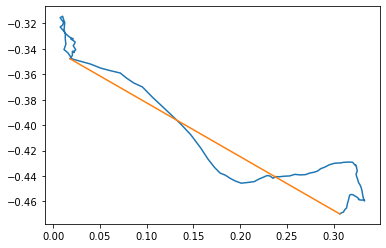

In [31]:

control_straightness_moment = path_analysis.straightness_moment_time(control.trial_list[session_no][trial_no][:,:3], before_time=2)
control_straightness_time = path_analysis.straightness_over_time(control.trial_list[session_no][trial_no][:,:3], before_time=2)
print('Control straightness example')
plt.plot(control_straightness_moment[2][:,0], control_straightness_moment[2][:,1])
plt.plot(control_straightness_moment[1][:,0], control_straightness_moment[1][:,1])

control_moment_straigtness_list = []
control_time_straigtness_list = []
for i in range(len(control.trial_list[session_no])):
    moment_, _, _ = path_analysis.straightness_moment_time(control.trial_list[session_no][i][:,:3], before_time=2)
    time_, _, _ = path_analysis.straightness_over_time(control.trial_list[session_no][i][:,:3], before_time=2)
    control_moment_straigtness_list.append(moment_)
    control_time_straigtness_list.append(time_)

Text(0.5, 0, 'Straightness')

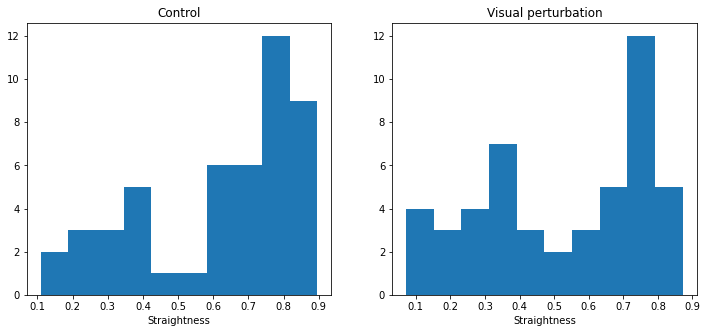

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Control')
plt.hist(control_moment_straigtness_list)
plt.xlabel('Straightness')
plt.subplot(122)
plt.title('Visual perturbation')
plt.hist(perturbation_moment_straigtness_list)
plt.xlabel('Straightness')

Time window exceeds the length of trajectory for this trial
Time window exceeds the length of trajectory for this trial
45
Invisible trial straightness is red, visible trials are in gray
Invisible trial straightness is red, visible trials are in gray


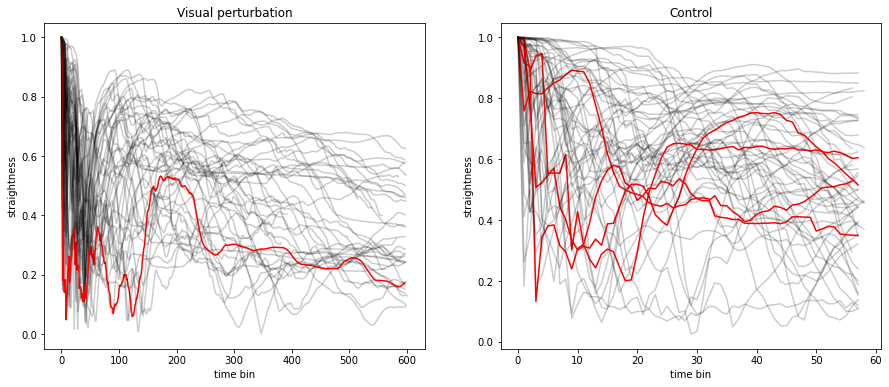

In [19]:
session_num = 3
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Visual perturbation')
for i in range(len(visual_perturbation.trial_list[session_num])):
    straightness_moment = path_analysis.straightness_moment_time(visual_perturbation.trial_list[session_num][i][:,:3], before_time=10)
    straightness_time = path_analysis.straightness_over_time(visual_perturbation.trial_list[session_num][i][:,:3], before_time=10)
    
    if straightness_time == None:
        print(i)
        continue
    
    if visual_perturbation.trial_visible[session_num][i]:
        plt.plot(straightness_time[0], c = 'k', alpha = 0.2)
    else:
        plt.plot(straightness_time[0], c='red')

plt.xlabel('time bin')
plt.ylabel('straightness')
    
print('Invisible trial straightness is red, visible trials are in gray')


plt.subplot(122)
plt.title('Control')
for i in range(len(control.trial_list[session_num])):
    straightness_moment = path_analysis.straightness_moment_time(control.trial_list[session_num][i][:,:3], before_time=1)
    straightness_time = path_analysis.straightness_over_time(control.trial_list[session_num][i][:,:3], before_time=1)
    
    if straightness_time == None:
        print(i)
        continue
    
    if control.trial_visible[session_num][i]:
        plt.plot(straightness_time[0], c = 'k', alpha = 0.2)
    else:
        plt.plot(straightness_time[0], c='red')
        
plt.xlabel('time bin')
plt.ylabel('straightness')
print('Invisible trial straightness is red, visible trials are in gray')

In [94]:
session_num = 0
trial_num = 0
bootstrap_sliding_window=path_analysis.bootstrap(visual_perturbation.trial_list[session_num][trial_num], num_sampling=10, time_window=2, straightness_type = 'sliding')


## Rearing analysis

In [ ]:
# Get rough visualization of z position profiles in each trials

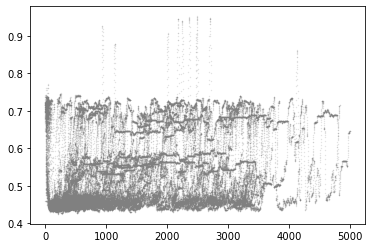

In [3]:
session_num = 0
for t in visual_perturbation.trial_list[session_num]:
    zs=t[:,-1]
    plt.scatter(np.arange(len(zs)),zs, c = 'gray', alpha = 0.3, s = 0.1)

In [3]:
rearing_data, rearing_counts, rearing_durations, rearing_distance_beacon = visual_perturbation.get_rearings()

/opt/homebrew/Caskroom/miniforge/base/envs/rearing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/rearing/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([ 8., 14., 18.,  2.,  5.,  0.,  5.,  0.,  4.,  1.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

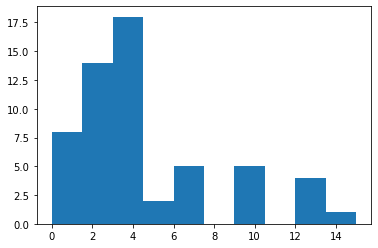

In [4]:
#Histogram of rearing counts in each trial
session_no = 1
plt.hist(rearing_counts[session_no])

Text(0.5, 0, 'Distance [m]')

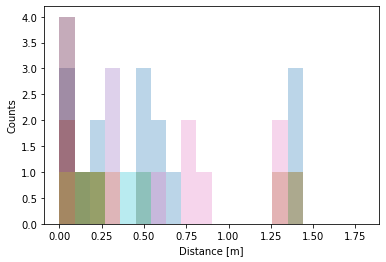

In [36]:
## Histogram of 'pure' distance from beacon at the time of rearings of during each trial(different color)
session_no = 2
for t in rearing_distance_beacon[session_no]:
    plt.hist(t, bins = 20, range = (0.0, 1.8), alpha = 0.3)
plt.ylabel('Counts')
plt.xlabel('Distance [m]')

In [5]:
## Histogram of weighted occupancy
rear_counts, hists, bins, visibility=rearing_distribution.get_normalized_rears(visual_perturbation, rearing_distance_beacon, 2)

NameError: name 'rearing_distance_beacon' is not defined

<BarContainer object of 23 artists>

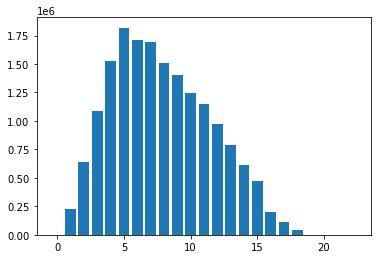

In [40]:
summed_hists = np.sum(hists, axis=0)
plt.bar(np.arange(len(summed_hists)),summed_hists)